## Use Case
Dataset consists of customers details of a mall with the spending score. Our goal is to segment customers based on their spending scores.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID and Genre are irrelevant for us, so we will drop it

In [3]:
# X = df.iloc[:,[3,4]].values
# X[:5]
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df 

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Finding the optimal no clusters using dendrogram

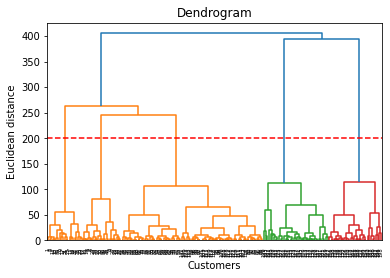

In [4]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(200, color='red', linestyle='--'); 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

To choose the number of clusters we draw a horizontal line to the longest line that
traverses maximum distance up and down without intersecting the merging points. 
So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case the no of clusters will be 5

In [5]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward', )#‘ward’ minimizes the variance of the clusters being merged.
y_pred = agc.fit_predict(df)

In [6]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

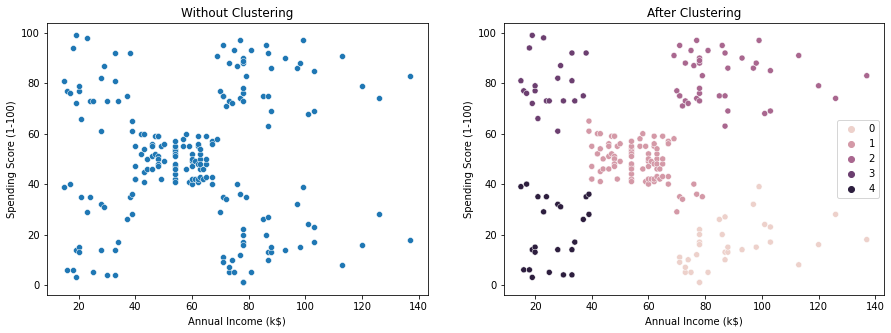

In [7]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Annual Income (k$)', y='Spending Score (1-100)').set_title('Without Clustering')
sns.scatterplot(ax=axes[1], data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=agc.labels_).set_title('After Clustering');

#### Happy Learning !!
You can connect and follow me @
  * [LinkedIn](https://www.linkedin.com/in/priya-singh1803)
  * [Github](https://github.com/piyu18/)
  * [Medium](https://medium.com/@priya1803)